In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from fancyimpute import KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score,precision_score,recall_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from gensim.models import Word2Vec, KeyedVectors
import nltk
from gensim.test.utils import common_texts
import regex
import re
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from keras import backend as K

smote = SMOTE(sampling_strategy='not majority')

import warnings
warnings.filterwarnings('ignore')

# Heart Stroke Prediction after Analysis and Preprocessing of the Dataset

In [3]:
#health_strokedf = pd.read_csv(r"C:\healthcare-dataset-stroke-data.csv")
health_strokedf = pd.read_csv(r"C:\healthcare-dataset-stroke-data.csv",na_values=['Unknown']) # we read the csv and drop the Unknown values(replaced with NaN) in the smoking_status column

In [4]:
def onehot(df,col):
    df = df.copy()
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,df_dummies], axis=1)
    df = df.drop(col, axis=1)
    return df

In [5]:
def encode_categcols(df,col_list) :
    df = df.copy()
      
    #df_dummy['ever_married'] = df_dummy['ever_married'].replace({'No': 0, 'Yes': 1})
    #df_dummy['Residence_type'] = df_dummy['Residence_type'].replace({'Rural': 0, 'Urban': 1})
    #col_list = ['gender','work_type','ever_married','Residence_type']    
    for  column in col_list:
         df = onehot(df,col=column)
        
    
    return df
        

# Linear Regression/fill bmi missing values

In [6]:
df_enc = health_strokedf.drop(['smoking_status'],axis=1)

In [7]:
#df_enc.gender_Other.isnull().sum()
#exists = 1 in df_enc.gender_Other
#print(exists)
enc_list_reg = ['gender','work_type','ever_married','Residence_type']
df_enc = encode_categcols(df_enc,enc_list_reg)
#print(df_enc['gender_Other'].where(df_enc['gender_Other'] == 1))

In [8]:
#recreate the bmi column without rows with missing values in bmi
df_drpnullbmi = df_enc.dropna(axis = 0, subset=['bmi'])
drpnull_col = df_drpnullbmi.loc[:,['bmi']]

#entries with null bmi
missing_bmi = df_enc[df_enc['bmi'].isnull()]
missing_bmin = missing_bmi.loc[:,['bmi']]
missing_bmi = missing_bmi.drop(['bmi'],axis=1)

X_enc = df_drpnullbmi.drop(['bmi'],axis=1)
Y_enc = drpnull_col

model = linear_model.LinearRegression()
model.fit(X = X_enc, y=Y_enc)


#missing_bmi
#for i in missing_bmi:


predbmi = model.predict(missing_bmi)
    #df_enc.iloc[i].bmi.replace(value=predbmi,inplace=True)   
df_enc.loc[df_enc.bmi.isnull(),'bmi'] = predbmi
    
df_enc
#X_enc
#Y_enc
#medianbmi_health['bmi'].fillna((medianbmi_health['bmi'].mean()), inplace=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,202.21,31.192102,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,32.418179,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,1,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,1,0


In [9]:
#df_enc.isnull().sum()
df_enc.head(20)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,202.21,31.192102,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,1,1,0
5,56669,81.0,0,0,186.21,29.000000,1,0,1,0,0,0,1,0,0,0,1,0,1
6,53882,74.0,1,1,70.09,27.400000,1,0,1,0,0,0,1,0,0,0,1,1,0
7,10434,69.0,0,0,94.39,22.800000,1,1,0,0,0,0,1,0,0,1,0,0,1
8,27419,59.0,0,0,76.15,29.197312,1,1,0,0,0,0,1,0,0,0,1,1,0
9,60491,78.0,0,0,58.57,24.200000,1,1,0,0,0,0,1,0,0,0,1,0,1


In [114]:
#health_strokedf.head(20)

#series

,id,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,formerly smoked,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,202.21,never smoked,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80.0,0,1,105.92,never smoked,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,smokes,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,never smoked,1,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,never smoked,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81.0,0,0,125.20,never smoked,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35.0,0,0,82.99,never smoked,0,1,0,0,0,0,0,1,0,0,1,1,0
5108,37544,51.0,0,0,166.29,formerly smoked,0,0,1,0,0,0,1,0,0,0,1,1,0


# Knn imputation/fill smoking status missing values

In [10]:
df_encknn = health_strokedf.drop(['bmi'],axis=1) #drop bmi so we dont deal with it in the knn filling
df_encknn = encode_categcols(df_encknn,['gender','work_type','ever_married','Residence_type'])

#labenc_knn = LabelEncoder()
#df_transf =  df_encknn.smoking_status
#df_encknn.smoking_status = labenc_knn.fit_transform(df_encknn.smoking_status)

#missing_smok = df_encknn[df_encknn['smoking_status'].isnull()]
#missing_bmin = missing_bmi.loc[:,['bmi']]
#knn_impute = KNNImputer(n_neighbors=5)
#knn_impute.fit_transform(df_encknn[['smoking_status_formerly smoked']])
#knn_impute.fit_transform(df_encknn[['smoking_status_never smoked']])
#knn_impute.fit_transform(df_encknn[['smoking_status_smokes']])
#list(labenc_knn.inverse_transform([0,1,2,3]))#returns labels coding

series = df_encknn['smoking_status']#label encode only values that are not null in smoking_status column
label_encoder = LabelEncoder()
df_encknn['smoking_status'] = pd.Series(
         label_encoder.fit_transform(series[series.notnull()]),
         index=series[series.notnull()].index
)

#ohe = OneHotEncoder()
df_encknn_np = KNN(k=1).fit_transform(df_encknn)#leave it at 1 so u dont get strange values in between the ints

#df_encknn['smoking_status'] = label_encoder.fit_transform(df_encknn['smoking_status'].notnull())
#knn_impute = KNNImputer(n_neighbors=5)
#df_encknn[['smoking_status']] = knn_impute.fit_transform(df_encknn[['smoking_status']])




df_encknn_np
#list(label_encoder.inverse_transform([0,1,2]))#returns labels coding
#df_encknn

Imputing row 1/5110 with 0 missing, elapsed time: 8.052
Imputing row 101/5110 with 1 missing, elapsed time: 8.054
Imputing row 201/5110 with 1 missing, elapsed time: 8.057
Imputing row 301/5110 with 1 missing, elapsed time: 8.060
Imputing row 401/5110 with 1 missing, elapsed time: 8.062
Imputing row 501/5110 with 0 missing, elapsed time: 8.065
Imputing row 601/5110 with 0 missing, elapsed time: 8.068
Imputing row 701/5110 with 0 missing, elapsed time: 8.071
Imputing row 801/5110 with 0 missing, elapsed time: 8.073
Imputing row 901/5110 with 0 missing, elapsed time: 8.076
Imputing row 1001/5110 with 0 missing, elapsed time: 8.079
Imputing row 1101/5110 with 0 missing, elapsed time: 8.082
Imputing row 1201/5110 with 1 missing, elapsed time: 8.085
Imputing row 1301/5110 with 1 missing, elapsed time: 8.088
Imputing row 1401/5110 with 0 missing, elapsed time: 8.090
Imputing row 1501/5110 with 0 missing, elapsed time: 8.093
Imputing row 1601/5110 with 1 missing, elapsed time: 8.095
Imputing 

array([[9.0460e+03, 6.7000e+01, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.1676e+04, 6.1000e+01, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.1112e+04, 8.0000e+01, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.9723e+04, 3.5000e+01, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.7544e+04, 5.1000e+01, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.4679e+04, 4.4000e+01, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [12]:
df_encknn=pd.DataFrame(df_encknn_np, columns=df_encknn.columns, index=df_encknn.index)
df_encknn

,id,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046.0,67.0,0.0,1.0,228.69,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,51676.0,61.0,0.0,0.0,202.21,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5106,44873.0,81.0,0.0,0.0,125.20,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5107,19723.0,35.0,0.0,0.0,82.99,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5108,37544.0,51.0,0.0,0.0,166.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [13]:
df_encknn.head(20)
for column in df_encknn[['id','age','hypertension','heart_disease','smoking_status','stroke','gender_Female','gender_Male','gender_Other','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban']]:
    df_encknn[column] = df_encknn[column].astype(int)
    

In [14]:
df_encall = df_encknn.copy()
#df_encall
#merged_bmi = pd.concat([df_encall,df_enc.bmi], axis='columns')
df_encall.insert(5, "bmi", df_enc['bmi'], True)

In [15]:
df_encall#has both bmi and smoking status filled

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67,0,1,228.69,36.600000,0,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61,0,0,202.21,31.192102,1,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80,0,1,105.92,32.500000,1,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49,0,0,171.23,34.400000,2,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79,1,0,174.12,24.000000,1,1,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80,1,0,83.75,32.418179,1,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81,0,0,125.20,40.000000,1,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35,0,0,82.99,30.600000,1,0,1,0,0,0,0,0,1,0,0,1,1,0
5108,37544,51,0,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0,0,1,1,0


In [16]:
df_encknn[df_encknn.smoking_status == 1.0]

,id,age,hypertension,heart_disease,avg_glucose_level,smoking_status,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
1,51676,61,0,0,202.21,1,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80,0,1,105.92,1,1,0,1,0,0,0,1,0,0,0,1,1,0
4,1665,79,1,0,174.12,1,1,1,0,0,0,0,0,1,0,0,1,1,0
6,53882,74,1,1,70.09,1,1,0,1,0,0,0,1,0,0,0,1,1,0
7,10434,69,0,0,94.39,1,1,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13,0,0,103.08,1,0,1,0,0,0,0,0,0,1,1,0,1,0
5105,18234,80,1,0,83.75,1,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81,0,0,125.20,1,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35,0,0,82.99,1,0,1,0,0,0,0,0,1,0,0,1,1,0


In [17]:
#df_encknn = health_strokedf.drop(['bmi'],axis=1) #drop bmi so we dont deal with it in the knn filling
#df_encknn = encode_categcols(df_encknn,['gender','work_type','ever_married','Residence_type'])
#missing_smok = health_strokedf[health_strokedf['smoking_status'].isnull()]
df_encknn.isnull().sum()

id                         0
age                        0
hypertension               0
heart_disease              0
avg_glucose_level          0
smoking_status             0
stroke                     0
gender_Female              0
gender_Male                0
gender_Other               0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
ever_married_No            0
ever_married_Yes           0
Residence_type_Rural       0
Residence_type_Urban       0
dtype: int64

In [18]:
health_strokedf.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          3
stroke                  2
dtype: int64

In [7]:
health_strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
health_strokedf.isna().sum()#leipoun 201 times apo to bmi

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
health_strokedf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
health_strokedf.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [11]:
health_strokedf.describe()#typonoume kapies statistikes plirofories gia ta dedomena mas

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## DATA VISUALIZATION AND ANALYSIS

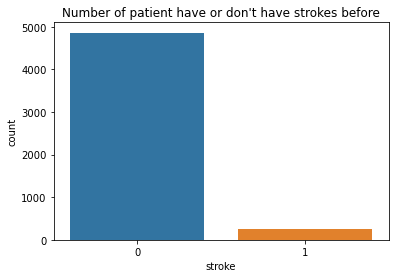

In [12]:
sns.countplot(x='stroke', data=health_strokedf)
plt.title("Number of patient have or don't have strokes before")
plt.show()#seems like we have an imbalance in the stroke column between the stroke,no stroke classes- we will attempt to use smote to fix this later

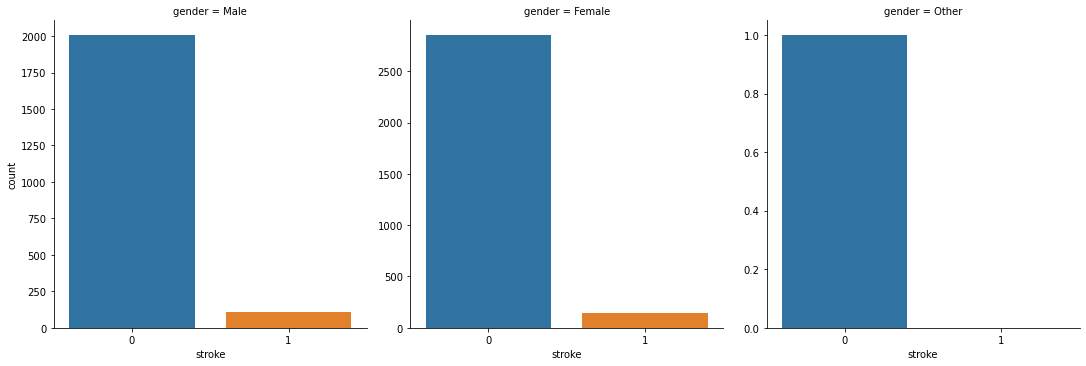

In [18]:
#gender and stroke count

sns.catplot(x='stroke', col='gender', kind='count', data=health_strokedf, sharey=False)
plt.show()

In [27]:
health_columns=health_strokedf.columns.tolist()

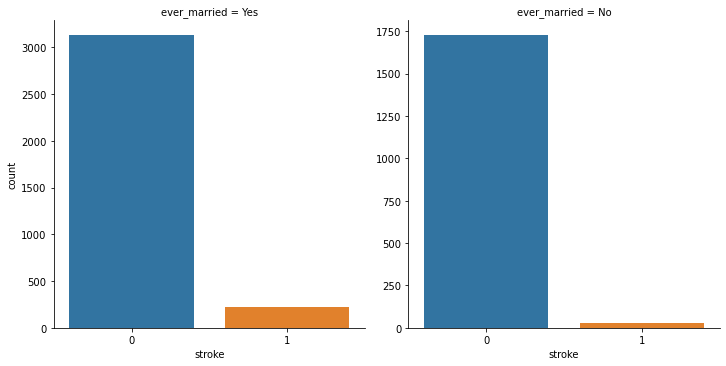

In [39]:
#for column in health_strokedf:
    
    sns.catplot(x='stroke', col='ever_married', kind='count', data=health_strokedf, sharey=False)
    plt.show()

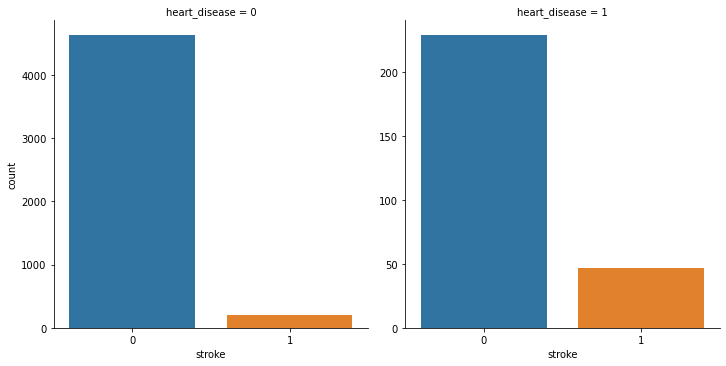

In [47]:
    sns.catplot(x='stroke', col='heart_disease', kind='count', data=health_strokedf, sharey=False)
    plt.show()

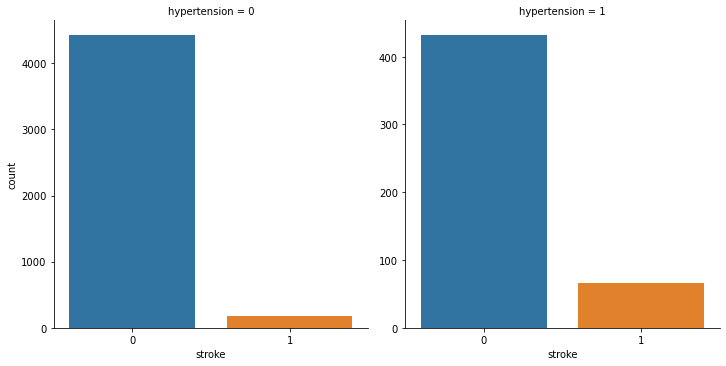

In [48]:
    sns.catplot(x='stroke', col='hypertension', kind='count', data=health_strokedf, sharey=False)
    plt.show()

In [52]:
pp.ProfileReport(health_strokedf)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
#we list the numerical and categorical columns in our dataset
numerical = ['age', 'bmi', 'avg_glucose_level']
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']

allcol = ['gender','age','hypertension','heart_disease','ever_married ','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']
     

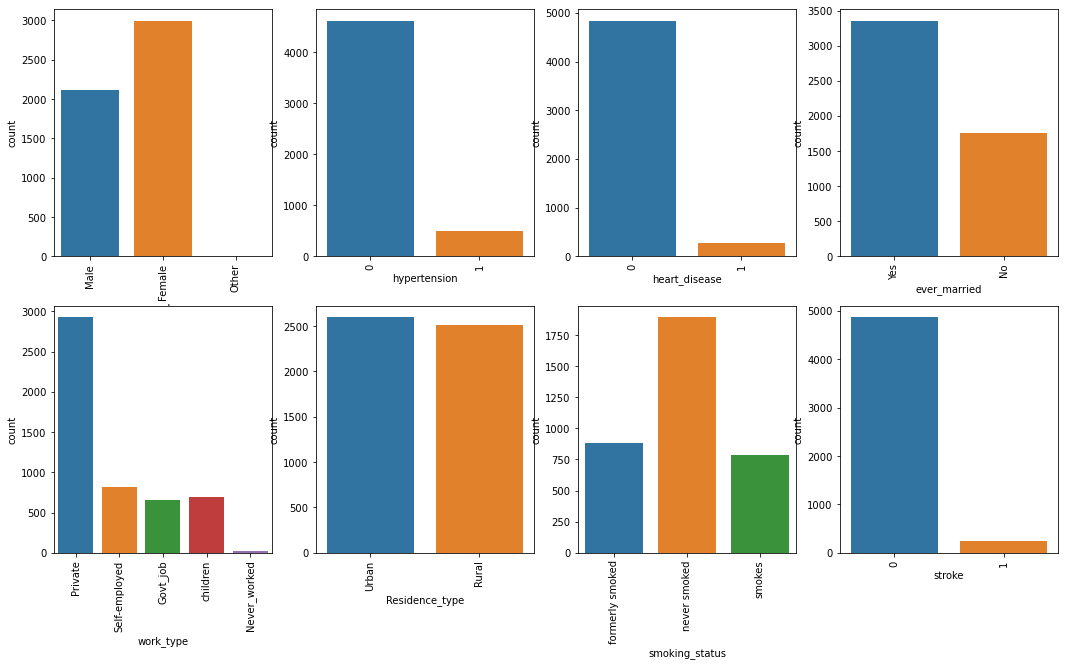

In [179]:
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(health_strokedf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

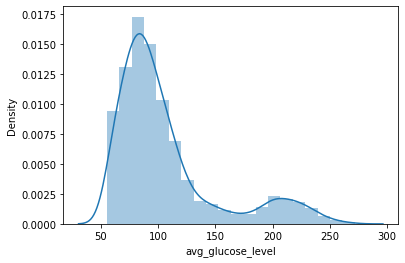

In [61]:
sns.distplot(health_strokedf['avg_glucose_level'], bins=20)

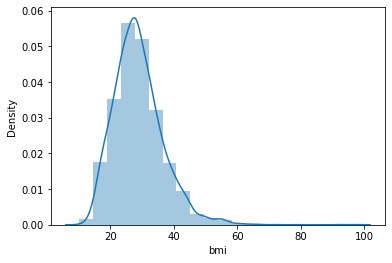

In [63]:
sns.distplot(health_strokedf['bmi'], bins=20)

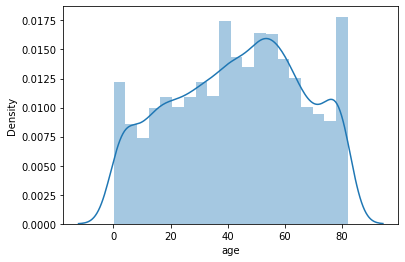

In [65]:
sns.distplot(health_strokedf['age'], bins=20)

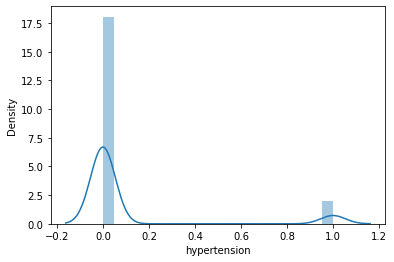

In [69]:
sns.distplot(health_strokedf['hypertension'], bins=20)

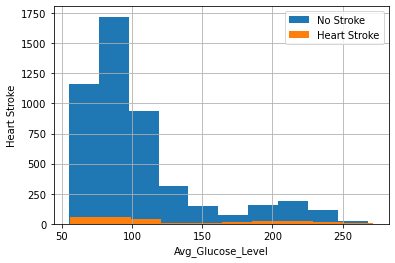

In [73]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'avg_glucose_level'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('Avg_Glucose_Level')
plt.ylabel('Heart Stroke')
plt.legend()

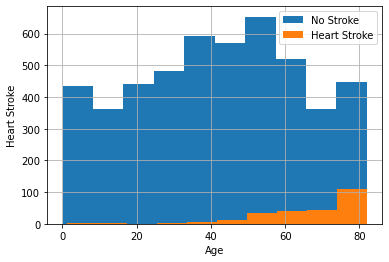

In [74]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'age'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'age'].hist(label='Heart Stroke')
plt.xlabel('Age')
plt.ylabel('Heart Stroke')
plt.legend()

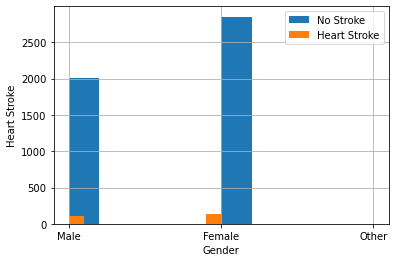

In [75]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'gender'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'gender'].hist(label='Heart Stroke')
plt.xlabel('Gender')
plt.ylabel('Heart Stroke')
plt.legend()

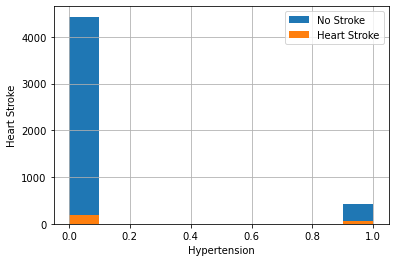

In [76]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'hypertension'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'hypertension'].hist(label='Heart Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Heart Stroke')
plt.legend()

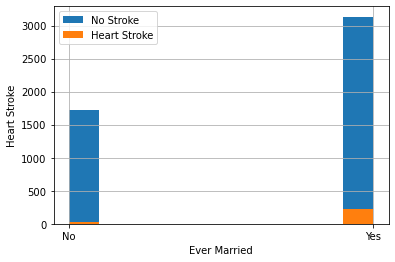

In [77]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'ever_married'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'ever_married'].hist(label='Heart Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Heart Stroke')
plt.legend()

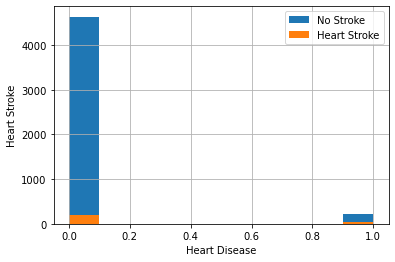

In [78]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'heart_disease'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'heart_disease'].hist(label='Heart Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Heart Stroke')
plt.legend()

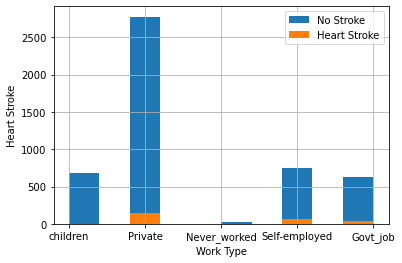

In [79]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'work_type'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'work_type'].hist(label='Heart Stroke')
plt.xlabel('Work Type')
plt.ylabel('Heart Stroke')
plt.legend()

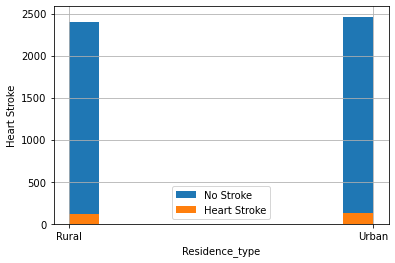

In [80]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'Residence_type'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'Residence_type'].hist(label='Heart Stroke')
plt.xlabel('Residence_type')
plt.ylabel('Heart Stroke')
plt.legend()

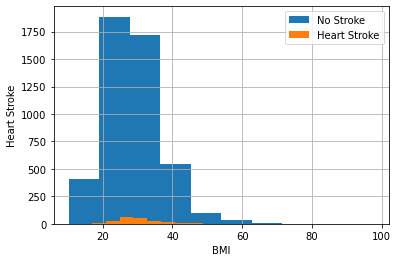

In [81]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'bmi'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'bmi'].hist(label='Heart Stroke')
plt.xlabel('BMI')
plt.ylabel('Heart Stroke')
plt.legend()

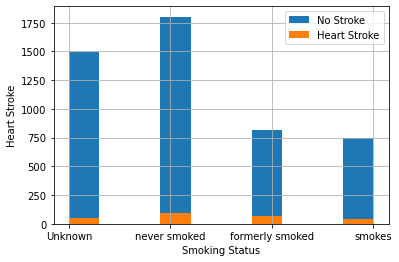

In [82]:
health_strokedf.loc[health_strokedf['stroke'] == 0,'smoking_status'].hist(label='No Stroke')
health_strokedf.loc[health_strokedf['stroke'] == 1,'smoking_status'].hist(label='Heart Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Stroke')
plt.legend()

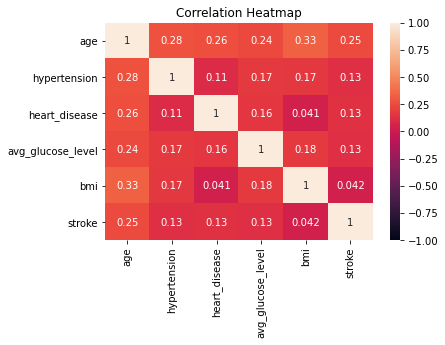

In [85]:
#correlation heatmap
heatmap = sns.heatmap(health_strokedf[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']].corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap');#when we are close to 0 less linear relation,closer to 1 when one characteristic is growing the other tends to do the same and the reverse when we are close to -1

In [86]:
health_strokedf.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [101]:
health_strokedf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [96]:
#health_strokedf.drop(health_strokedf.index[health_strokedf['smoking_status'] == 'Unknown'], inplace = True)

In [19]:
health_strokedf.bmi.isnull().sum()

201

In [20]:
health_strokedf[(health_strokedf.bmi.isnull())& (health_strokedf.smoking_status == 'Unknown')]#where bmi is NaN and smoking status is unknown

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [161]:
#health_strokedf.drop[health_strokedf.smoking_status == 'Unknown']
#health_strokedf.drop(health_strokedf.loc[health_strokedf['smoking_status']=='Unknown'].index, inplace=True)
#health_strokedf['smoking_status'] = health_strokedf['smoking_status'].replace(['N/A'],'NaNN')


In [176]:
health_strokedf.smoking_status.isnull().sum()

1544

In [177]:
health_strokedf[(health_strokedf.smoking_status!='formerly smoked')&(health_strokedf.smoking_status!='never smoked') & (health_strokedf.smoking_status!='smokes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,NaN,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,NaN,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,NaN,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,NaN,0


In [4]:
health_strokedf.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [21]:
#erotima 1B,afairesi stilis,afairoume tis dyo stiles me tis missing values diladi tis bmi,smoking status
dropcols_health = health_strokedf.drop(['bmi','smoking_status'],axis=1)

In [22]:
health_strokedf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
dropcols_health = encode_categcols(dropcols_health,['gender','work_type','ever_married','Residence_type'])
dropcols_health

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,202.21,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80.0,0,1,105.92,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,1,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81.0,0,0,125.20,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35.0,0,0,82.99,0,1,0,0,0,0,0,1,0,0,1,1,0
5108,37544,51.0,0,0,166.29,0,0,1,0,0,0,1,0,0,0,1,1,0


In [24]:
health_strokedf.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [11]:
dropcols_health.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,1


In [12]:
dropcols_health.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
stroke               0
dtype: int64

In [33]:
health_strokedf[health_strokedf.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [34]:
health_strokedf.iloc[8]

id                     27419
gender                Female
age                       59
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Rural
avg_glucose_level      76.15
bmi                      NaN
smoking_status           NaN
stroke                     1
Name: 8, dtype: object

In [25]:
bmi_mean = health_strokedf.bmi.mean()
print(bmi_mean)

28.893236911794666


In [26]:
#afairesi stilis me katigorika dedomena smoking_status kai simplirosi timon tis bmi me to meso oro ton stoixeion tis stilis
medianbmi_health = health_strokedf.drop(['smoking_status'],axis=1)
medianbmi_health = encode_categcols(medianbmi_health,['gender','work_type','ever_married','Residence_type'])
medianbmi_health['bmi'].fillna((medianbmi_health['bmi'].mean()), inplace=True)

In [27]:
medianbmi_health.iloc[8]

id                         27419.000000
age                           59.000000
hypertension                   0.000000
heart_disease                  0.000000
avg_glucose_level             76.150000
bmi                           28.893237
stroke                         1.000000
gender_Female                  1.000000
gender_Male                    0.000000
gender_Other                   0.000000
work_type_Govt_job             0.000000
work_type_Never_worked         0.000000
work_type_Private              1.000000
work_type_Self-employed        0.000000
work_type_children             0.000000
ever_married_No                0.000000
ever_married_Yes               1.000000
Residence_type_Rural           1.000000
Residence_type_Urban           0.000000
Name: 8, dtype: float64

In [65]:
df_encall.bmi.iloc[8]

29.19731211248132

In [66]:
medianbmi_health.bmi.iloc[8]

28.893236911794666

In [28]:
medianbmi_health

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,1,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,1,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,1,0


In [59]:
medianbmi_health.bmi.head(20) #the filling was done correctly

0     36.600000
1     28.893237
2     32.500000
3     34.400000
4     24.000000
5     29.000000
6     27.400000
7     22.800000
8     28.893237
9     24.200000
10    29.700000
11    36.800000
12    27.300000
13    28.893237
14    28.200000
15    30.900000
16    37.500000
17    25.800000
18    37.800000
19    28.893237
Name: bmi, dtype: float64

In [29]:
#fill missing values in bmi using linear regression and removing smoking_status 
linregbmi_health = health_strokedf.drop(['smoking_status'],axis=1)


In [30]:
linregbmi_health

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


In [19]:
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline


In [20]:
column_trans = make_column_transformer(
     (OneHotEncoder(),['gender','ever_married','work_type','Residence_type']),
      remainder = 'passthrough')

In [21]:
ohe_linregbmi = column_trans.fit_transform(linregbmi_health)
ohe_linregbmi

array([[  0.  ,   1.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  1.  ,   0.  ,   0.  , ..., 202.21,    nan,   1.  ],
       [  0.  ,   1.  ,   0.  , ..., 105.92,  32.5 ,   1.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  82.99,  30.6 ,   0.  ],
       [  0.  ,   1.  ,   0.  , ..., 166.29,  25.6 ,   0.  ],
       [  1.  ,   0.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [31]:
listX =health_strokedf.index[health_strokedf['bmi'].isnull() == True].tolist()#returns all positions where bmi is null
listX_health=list()

listY = health_strokedf.index[health_strokedf['bmi'].isnull() == False].tolist()
listY_health=list()


In [32]:
#npXhealth = np.array
def returnBmiMissVal():#return all missing elements in bmi that need to be filled with something
        for i in range(len(listX)):
            #print(listX[i])
            #listX_health.append(health_strokedf[listX[i]].astype(float))
            listX_health.append((health_strokedf['bmi'][listX[i]]))
        
       
    
        nplistX = np.array(listX_health)
        return nplistX
            
    

In [33]:
#listY_health=list()
def returnBmiNonMiss():#return all elements that do not count as missing in the bmi column
    for i in range(len(listY)):
            #print(listX[i])
            #listX_health.append(health_strokedf[listX[i]].astype(float))
            listY_health.append((health_strokedf['bmi'][listY[i]]))
        
            
    nplistY = np.array(listY_health)
    return nplistY
       

In [220]:

#returnBmiMissVal()
#returnBmiNonMiss()
#npXhealth

array([   0,    2,    3, ..., 5107, 5108, 5109])

In [63]:
linregbmi_health['bmi'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [35]:
listX_health=list()
def returnBmiMissVal():#return all missing elements in bmi that need to be filled with something
       for i in range(len(listX)):
            #print(listX[i])
            #listX_health.append(health_strokedf[listX[i]].astype(float))
            listX_health.append((health_strokedf['bmi'][listX[i]]))
        
       
    
       return listX_health
            
    

In [140]:
returnBmiColVal()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [72]:
listX = list()
listX.append([health_strokedf['bmi'].isnull() == True].index)
listX

[<function list.index>]

In [77]:
listX =health_strokedf.index[health_strokedf['bmi'].isnull() == True].tolist()#returns all positions where bmi is null
listX

[1,
 8,
 13,
 19,
 27,
 29,
 43,
 46,
 50,
 51,
 54,
 57,
 64,
 70,
 78,
 81,
 84,
 105,
 112,
 124,
 126,
 129,
 133,
 146,
 150,
 160,
 161,
 162,
 167,
 170,
 171,
 174,
 178,
 183,
 189,
 198,
 200,
 218,
 227,
 247,
 342,
 360,
 432,
 477,
 479,
 522,
 668,
 671,
 680,
 729,
 742,
 865,
 867,
 872,
 879,
 903,
 936,
 965,
 1102,
 1106,
 1115,
 1183,
 1194,
 1214,
 1235,
 1241,
 1277,
 1293,
 1300,
 1306,
 1324,
 1342,
 1352,
 1427,
 1457,
 1466,
 1468,
 1471,
 1503,
 1528,
 1539,
 1546,
 1596,
 1640,
 1644,
 1646,
 1650,
 1669,
 1670,
 1681,
 1718,
 1719,
 1730,
 1753,
 1756,
 1779,
 1816,
 1836,
 1837,
 1866,
 1894,
 1906,
 1912,
 1981,
 1993,
 2030,
 2103,
 2105,
 2109,
 2192,
 2215,
 2263,
 2285,
 2321,
 2322,
 2339,
 2343,
 2477,
 2494,
 2502,
 2515,
 2529,
 2532,
 2541,
 2582,
 2697,
 2739,
 2752,
 2768,
 2788,
 2816,
 2828,
 2855,
 2867,
 2879,
 2897,
 2914,
 2960,
 2997,
 3007,
 3028,
 3048,
 3059,
 3074,
 3104,
 3111,
 3135,
 3161,
 3162,
 3164,
 3176,
 3197,
 3214,
 3215,

In [38]:
def getIndexes(dfObj, column):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    #result = dfObj.isin([value])
    # Get list of columns that contains the value
    #seriesObj = result.any()
    #columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    #for col in columnNames:
    row = list(dfObj[column][result[column] == True].index)
    for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [39]:
#drop rows from dataframe which have bmi null
bmi_drpnulldf = health_strokedf.drop(['smoking_status'],axis=1)
bmi_drpnulldf.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,1


In [8]:
bmi_drpnulldf.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [10]:
#drop the na values from bmi
bmi_drpnulldf.dropna(inplace=True)

In [11]:
bmi_drpnulldf.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [70]:
#y_train data for linear regression,rows from initial dataframe without null values at bmi col,which is the bmi_drpnulldf
Y_train = bmi_drpnulldf['bmi']
Y_train

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [40]:
#x_train data for linear regression,rows from bmi_drpnulldf except the bmi column which does not containt null values
X_train = bmi_drpnulldf.drop('bmi',axis=1)
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,0


In [28]:
#dummies_categ = pd.get_dummies(bmi_drpnulldf.gender,bmi_drpnulldf.work_type,bmi_drpnulldf.Residence_type)#one hot encodes the gender column
dummies_gender = pd.get_dummies(bmi_drpnulldf.gender)
dummies_work = pd.get_dummies(bmi_drpnulldf.work_type)
dummies_resid = pd.get_dummies(bmi_drpnulldf.Residence_type)
dummies_married = pd.get_dummies(bmi_drpnulldf.ever_married)


In [30]:
#merge_onehot = pd.concat([bmi_drpnulldf,dummies_gender,dummies_work,dummies_resid],axis='columns')
merged_gender = pd.concat([bmi_drpnulldf,dummies_gender],axis='columns')
merged_work = pd.concat([merged_gender,dummies_work],axis='columns')
merged_resid = pd.concat([merged_work,dummies_resid],axis='columns')
merged_married = pd.concat([merged_resid,dummies_married],axis='columns')


In [32]:
finl_onehot = merged_married.drop(['gender','work_type','Residence_type'],axis='columns')
#finl_gend = merged_gender.drop(['gender'],axis='columns')
#finl_work = finl_gend.drop(['work_type'],axis='columns')
#finl_gend = merged_gender.drop(['Residence_type'],axis='columns')
finl_onehot

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,No,Yes
0,9046,67.0,0,1,Yes,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,1
1,51676,61.0,0,0,Yes,202.21,NaN,1,1,0,0,0,0,0,1,0,1,0,0,1
2,31112,80.0,0,1,Yes,105.92,32.5,1,0,1,0,0,0,1,0,0,1,0,0,1
3,60182,49.0,0,0,Yes,171.23,34.4,1,1,0,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,Yes,174.12,24.0,1,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,83.75,NaN,0,1,0,0,0,0,1,0,0,0,1,0,1
5106,44873,81.0,0,0,Yes,125.20,40.0,0,1,0,0,0,0,0,1,0,0,1,0,1
5107,19723,35.0,0,0,Yes,82.99,30.6,0,1,0,0,0,0,0,1,0,1,0,0,1
5108,37544,51.0,0,0,Yes,166.29,25.6,0,0,1,0,0,0,1,0,0,1,0,0,1


In [80]:
#finl_work

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other
0,9046,67.0,0,1,Yes,Urban,228.69,36.6,1,0,1,0
2,31112,80.0,0,1,Yes,Rural,105.92,32.5,1,0,1,0
3,60182,49.0,0,0,Yes,Urban,171.23,34.4,1,1,0,0
4,1665,79.0,1,0,Yes,Rural,174.12,24.0,1,1,0,0
5,56669,81.0,0,0,Yes,Urban,186.21,29.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,No,Rural,103.08,18.6,0,1,0,0
5106,44873,81.0,0,0,Yes,Urban,125.20,40.0,0,1,0,0
5107,19723,35.0,0,0,Yes,Rural,82.99,30.6,0,1,0,0
5108,37544,51.0,0,0,Yes,Rural,166.29,25.6,0,0,1,0


In [43]:
#from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()

In [44]:
dflabenc = bmi_drpnulldf

In [78]:
dflabenc.gender = labenc.fit_transform(dflabenc.gender)
dflabenc.work_type = labenc.fit_transform(dflabenc.work_type)
dflabenc.Residence_type = labenc.fit_transform(dflabenc.Residence_type)
dflabenc.ever_married = labenc.fit_transform(dflabenc.ever_married)

In [84]:
dflabenc.gender=labenc.fit_transform(dflabenc.gender)

In [85]:
dflabenc[dflabenc['gender'].values == 2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
3116,56156,2,26.0,0,0,0,2,0,143.33,22.4,0


In [86]:
#ealth_strokedf[health_strokedf['gender'].values == 'Female']

In [87]:
dflabenc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,0


In [88]:
Y_train = dflabenc['bmi']
Y_train

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [82]:
X_train = dflabenc.drop('bmi',axis=1)
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,1
1,51676,0,61.0,0,0,1,3,0,202.21,1
2,31112,1,80.0,0,1,1,2,0,105.92,1
3,60182,0,49.0,0,0,1,2,1,171.23,1
4,1665,0,79.0,1,0,1,3,0,174.12,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,0
5106,44873,0,81.0,0,0,1,3,1,125.20,0
5107,19723,0,35.0,0,0,1,3,0,82.99,0
5108,37544,1,51.0,0,0,1,2,0,166.29,0


In [53]:
lr = LinearRegression()
#lr.fit(X_train, Y_train)

In [127]:
dflabenc[dflabenc.bmi.isnull() == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke


In [45]:
# get indexes of rows that have NaN value
def get_bmi_indexes_to_replace(bmi_drpnulldf):
    bmi_temp_list = bmi_drpnulldf["bmi"].values.tolist()
    indexes_bmi_replace = []
    bmi_temp_list = [str(x) for x in bmi_temp_list]
    for i, item in enumerate(bmi_temp_list):
        if item == "nan":
            indexes_bmi_replace.append(i)
    return indexes_bmi_replace

In [49]:
indexes_to_replace = get_bmi_indexes_to_replace(dflabenc)

In [50]:
indexes_to_replace

[1,
 8,
 13,
 19,
 27,
 29,
 43,
 46,
 50,
 51,
 54,
 57,
 64,
 70,
 78,
 81,
 84,
 105,
 112,
 124,
 126,
 129,
 133,
 146,
 150,
 160,
 161,
 162,
 167,
 170,
 171,
 174,
 178,
 183,
 189,
 198,
 200,
 218,
 227,
 247,
 342,
 360,
 432,
 477,
 479,
 522,
 668,
 671,
 680,
 729,
 742,
 865,
 867,
 872,
 879,
 903,
 936,
 965,
 1102,
 1106,
 1115,
 1183,
 1194,
 1214,
 1235,
 1241,
 1277,
 1293,
 1300,
 1306,
 1324,
 1342,
 1352,
 1427,
 1457,
 1466,
 1468,
 1471,
 1503,
 1528,
 1539,
 1546,
 1596,
 1640,
 1644,
 1646,
 1650,
 1669,
 1670,
 1681,
 1718,
 1719,
 1730,
 1753,
 1756,
 1779,
 1816,
 1836,
 1837,
 1866,
 1894,
 1906,
 1912,
 1981,
 1993,
 2030,
 2103,
 2105,
 2109,
 2192,
 2215,
 2263,
 2285,
 2321,
 2322,
 2339,
 2343,
 2477,
 2494,
 2502,
 2515,
 2529,
 2532,
 2541,
 2582,
 2697,
 2739,
 2752,
 2768,
 2788,
 2816,
 2828,
 2855,
 2867,
 2879,
 2897,
 2914,
 2960,
 2997,
 3007,
 3028,
 3048,
 3059,
 3074,
 3104,
 3111,
 3135,
 3161,
 3162,
 3164,
 3176,
 3197,
 3214,
 3215,

In [46]:
def linear_bmi_predictions(df, indexes_bmi_replace):
    df_temp = df.drop(["bmi"], axis = 1)
    bmi_predictions = []
    for i in indexes_bmi_replace:
        x = df_temp.iloc[i]
        x = np.array(x).reshape(1,-1)
        pred = lr.predict(x)
        bmi_predictions.append(pred)
    return bmi_predictions

In [55]:
def fill_bmi_nan(df, indexes_bmi_replace, bmi_predictions):
    for i, item in enumerate(indexes_bmi_replace):
        df["bmi"][item] =  bmi_predictions[i]
    return df

In [56]:
dflabenc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


In [179]:
lin_filldf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.569880,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,33.536465,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,0


In [180]:
from sklearn.neighbors import KNeighborsClassifier
modlknn = KNeighborsClassifier(n_neighbors=5)



In [32]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
dflabenc.gender = labenc.fit_transform(dflabenc.gender)
dflabenc.work_type = labenc.fit_transform(dflabenc.work_type)
dflabenc.Residence_type = labenc.fit_transform(dflabenc.Residence_type)
dflabenc.ever_married = labenc.fit_transform(dflabenc.ever_married)

In [78]:
smokeknndf = health_strokedf.drop(["bmi"],axis=1)


In [86]:
smokelbenc = LabelEncoder()

notnullsmokedf = health_strokedf[health_strokedf.smoking_status.isnull() == False]

smokeknndf.gender = smokelbenc.fit_transform(smokeknndf.gender)
smokeknndf.work_type = smokelbenc.fit_transform(smokeknndf.work_type)
smokeknndf.Residence_type = smokelbenc.fit_transform(smokeknndf.Residence_type)
smokeknndf.ever_married = smokelbenc.fit_transform(smokeknndf.ever_married)
#smokeknndf.smoking_status = smokelbenc.fit_transform(health_strokedf.smoking_status.isnull() == False)
smokeknndf.smoking_status = smokelbenc.fit_transform(health_strokedf.smoking_status.isnull() == False)

In [88]:
#notnullsmokedf = health_strokedf[health_strokedf.smoking_status.isnull() == False]
#health_strokedf.smoking_status
#smokeknndf
#notnullsmokedf.drop(['bmi'],axis=1)
#notnullsmokedf.isnull().sum()
smokeknndf
#smokeknndf.smoking_status

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,1,1
4,1665,0,79.0,1,0,1,3,0,174.12,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,1,0
5106,44873,0,81.0,0,0,1,3,1,125.20,1,0
5107,19723,0,35.0,0,0,1,3,0,82.99,1,0
5108,37544,1,51.0,0,0,1,2,0,166.29,1,0


In [24]:
smokeknndf.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,0,1
2,31112,1,80.0,0,1,1,2,0,105.92,0,1
3,60182,0,49.0,0,0,1,2,1,171.23,0,1
4,1665,0,79.0,1,0,1,3,0,174.12,0,1
5,56669,1,81.0,0,0,1,2,1,186.21,0,1
6,53882,1,74.0,1,1,1,2,0,70.09,0,1
7,10434,0,69.0,0,0,0,2,1,94.39,0,1
8,27419,0,59.0,0,0,1,2,0,76.15,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,0,1


In [28]:
health_strokedf.smoking_status

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109                NaN
Name: smoking_status, Length: 5110, dtype: object

In [36]:
knnimpute_df = knn_imputer.fit_transform(smokeknndf)

In [6]:
health_strokedf[health_strokedf.smoking_status.isnull() == True]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,NaN,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,NaN,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,NaN,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,NaN,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,NaN,0


In [39]:
knnimpute_df

array([[9.0460e+03, 1.0000e+00, 6.7000e+01, ..., 2.2869e+02, 0.0000e+00,
        1.0000e+00],
       [5.1676e+04, 0.0000e+00, 6.1000e+01, ..., 2.0221e+02, 1.0000e+00,
        1.0000e+00],
       [3.1112e+04, 1.0000e+00, 8.0000e+01, ..., 1.0592e+02, 1.0000e+00,
        1.0000e+00],
       ...,
       [1.9723e+04, 0.0000e+00, 3.5000e+01, ..., 8.2990e+01, 1.0000e+00,
        0.0000e+00],
       [3.7544e+04, 1.0000e+00, 5.1000e+01, ..., 1.6629e+02, 0.0000e+00,
        0.0000e+00],
       [4.4679e+04, 0.0000e+00, 4.4000e+01, ..., 8.5280e+01, 3.0000e+00,
        0.0000e+00]])

In [56]:
health_strokedf.smoking_status

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109                NaN
Name: smoking_status, Length: 5110, dtype: object

In [67]:
#df_encall->has both bmi and smoking_status as filled from reg and knn each, df_enc->linear reg fill bmi, df_encknn->knn fill smoking_status, medianbmi_health->fill bmi with mean, dropcols_health->drop both columns bmi and smoking_status
print(df_encall)
print(df_enc)
print(df_encknn)
print(medianbmi_health)
print(dropcols_health)

         id  age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046   67             0              1             228.69  36.600000   
1     51676   61             0              0             202.21  31.192102   
2     31112   80             0              1             105.92  32.500000   
3     60182   49             0              0             171.23  34.400000   
4      1665   79             1              0             174.12  24.000000   
...     ...  ...           ...            ...                ...        ...   
5105  18234   80             1              0              83.75  32.418179   
5106  44873   81             0              0             125.20  40.000000   
5107  19723   35             0              0              82.99  30.600000   
5108  37544   51             0              0             166.29  25.600000   
5109  44679   44             0              0              85.28  26.200000   

      smoking_status  stroke  gender_Female  gender

In [68]:
df_encall

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5110 non-null   int32  
 1   age                      5110 non-null   int32  
 2   hypertension             5110 non-null   int32  
 3   heart_disease            5110 non-null   int32  
 4   avg_glucose_level        5110 non-null   float64
 5   bmi                      5110 non-null   float64
 6   smoking_status           5110 non-null   int32  
 7   stroke                   5110 non-null   int32  
 8   gender_Female            5110 non-null   int32  
 9   gender_Male              5110 non-null   int32  
 10  gender_Other             5110 non-null   int32  
 11  work_type_Govt_job       5110 non-null   int32  
 12  work_type_Never_worked   5110 non-null   int32  
 13  work_type_Private        5110 non-null   int32  
 14  work_type_Self-employed 

In [180]:
#df_cop = health_strokedf.copy()
df_cop = dropcols_health.copy()
#df_cop = df_cop.drop(['bmi','smoking_status'],axis=1)  

#le = LabelEncoder()
#object_col = [col for col in df_cop.columns if df_cop[col].dtype == 'object']
#for col in object_col:
   # df_cop[col] = le.fit_transform(df_cop[col])

df_cop.isnull().sum()   

id                         0
age                        0
hypertension               0
heart_disease              0
avg_glucose_level          0
stroke                     0
gender_Female              0
gender_Male                0
gender_Other               0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
ever_married_No            0
ever_married_Yes           0
Residence_type_Rural       0
Residence_type_Urban       0
dtype: int64

In [265]:
smote = SMOTE()

In [398]:
def DoPredicts(dflist,dfnames,smote_status):#takes as argument a list of dataframes to do predictions on stroke with random forest classifier and print metrics,if smote status=1 we do smote on train set to try cure the dataset imbalance on the stroke classes of 0 and 1 otherwise if its 0 we maintain the dataset as given
    
    if(smote_status == 1):
        print("We use smote to try to fix imbalance")
        
    else:
        print("We dont use smote here") 
    
    
    for i,j in zip(dflist,dfnames):
        df_temp = i.copy()
        if(smote_status == 1):
            X_forst, Y_forst = smote.fit_resample(df_temp.drop(columns=['stroke','id']), df_temp['stroke'])
            
        else:
            Y_forst = df_temp['stroke']
            X_forst = df_temp.drop(columns=['stroke','id'])
            
       #X_forst = df_temp.drop(columns=['stroke','id'])
       #Y_forst = df_temp['stroke']
        
        X_train, X_test, y_train, y_test = train_test_split(X_forst, Y_forst, train_size=0.75,shuffle=True,random_state=1)
       
       
        randF = RandomForestClassifier(max_features='auto', bootstrap=True,random_state=1,verbose=0)
        
       
        
        randF.fit(X_train, y_train)
        randF_pred = randF.predict(X_test)
        randF_f1 = f1_score(y_test,randF_pred)
        randf_prec = precision_score(y_test,randF_pred)
        randf_recall = recall_score(y_test,randF_pred)
        randf_acc = accuracy_score(y_test,randF_pred)
        indexes = ['f1_score','precision_score','recall_score','accuracy']
        randFtabl = pd.DataFrame({'RandomForestClassifier': [randF_f1, randf_prec,randf_recall,randf_acc]}, index=indexes)
        print("The scores for the dataframe"+' '+j+":")
        #print(j)
        print(randFtabl)

In [399]:
df_list = [dropcols_health,medianbmi_health,df_enc,df_encknn,df_encall]
df_listnames = ['dropcols_health','medianbmi_health','df_enc','df_encknn','df_encall']

DoPredicts(df_list,df_listnames,0)
DoPredicts(df_list,df_listnames,1)
#df_list
     

We dont use smote here
The scores for the dataframe dropcols_health:
                 RandomForestClassifier
f1_score                       0.023810
precision_score                0.111111
recall_score                   0.013333
accuracy                       0.935837
The scores for the dataframe medianbmi_health:
                 RandomForestClassifier
f1_score                       0.025974
precision_score                0.500000
recall_score                   0.013333
accuracy                       0.941315
The scores for the dataframe df_enc:
                 RandomForestClassifier
f1_score                       0.025974
precision_score                0.500000
recall_score                   0.013333
accuracy                       0.941315
The scores for the dataframe df_encknn:
                 RandomForestClassifier
f1_score                       0.050000
precision_score                0.400000
recall_score                   0.026667
accuracy                       0.940532
The sco

In [89]:
(df_encall['stroke'] == 0).sum()

4861

In [92]:
(health_strokedf['stroke'] == 1).sum()

249

In [585]:
#arxika kano problepsi gia to dropcols_health
Y_forest = df_encall['stroke']
X_forest = df_encall.drop(['stroke','id'],axis=1)



In [520]:
X_train, X_test, y_train, y_test = train_test_split(X_forest, Y_forest, train_size=0.75,shuffle=True,random_state=1)

#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [515]:
y_test

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
2490    0
5078    0
4879    0
3125    0
4694    0
Name: stroke, Length: 1278, dtype: int32

In [521]:
randF = RandomForestClassifier(n_estimators=3)
randF.fit(X_train, y_train)
#X_train

RandomForestClassifier(n_estimators=3)

In [522]:
randF_pred = randF.predict(X_test)
randF_f1 = f1_score(y_test,randF_pred)
randf_prec = precision_score(y_test,randF_pred)
randf_recall = recall_score(y_test,randF_pred)
randf_acc = accuracy_score(y_test,randF_pred)
indexes = ['f1_score','precision_score','recall_score','accuracy']


randFtabl = pd.DataFrame({
    'RandomForestClassifier': [randF_f1, randf_prec,randf_recall,randf_acc]
}, index=indexes)

In [523]:
randFtabl

,RandomForestClassifier
f1_score,0.110092
precision_score,0.176471
recall_score,0.080000
accuracy,0.924100


In [270]:
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
4653,53115,78.0,0,0,73.56,1,0,0,1,0,0,0,0,0,1,0,1
5106,44873,81.0,0,0,125.20,1,0,0,0,0,0,1,0,0,1,0,1
974,11973,10.0,0,0,124.60,1,0,0,0,0,0,0,1,1,0,0,1
3967,42727,61.0,0,0,60.91,1,0,0,0,0,1,0,0,0,1,1,0
2831,6233,70.0,1,0,118.81,0,1,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,36355,58.0,0,0,111.73,0,1,0,1,0,0,0,0,0,1,1,0
3079,575,13.0,0,0,98.65,0,1,0,0,0,0,0,1,1,0,1,0
1194,542,3.0,0,0,79.63,1,0,0,0,0,0,0,1,1,0,0,1
2290,61895,65.0,0,0,220.47,1,0,0,0,0,1,0,0,0,1,1,0


In [151]:
y_train

1914    0
1751    0
396     0
1783    0
2361    0
       ..
2895    0
2763    0
905     0
3980    0
235     1
Name: stroke, Length: 3832, dtype: int64

In [153]:
X_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level
4673,49833,0,42.00,0,0,1,0,0,112.98
3232,20375,0,78.00,0,0,1,2,1,78.29
3694,39834,1,28.00,0,0,0,2,1,73.27
1070,42550,0,81.00,0,0,1,3,0,246.34
4163,19907,0,52.00,0,0,1,2,0,97.05
...,...,...,...,...,...,...,...,...,...
2490,48406,1,0.88,0,0,0,4,1,85.38
5078,27446,0,8.00,0,0,0,4,1,76.31
4879,32617,1,3.00,0,0,0,4,1,81.88
3125,31161,0,26.00,0,0,0,0,1,88.88


In [154]:
y_test

4673    0
3232    0
3694    0
1070    0
4163    0
       ..
2490    0
5078    0
4879    0
3125    0
4694    0
Name: stroke, Length: 1278, dtype: int64

# Email Spam Prediction

In [222]:
spam_df = pd.read_csv('C:/spam_or_not_spam.csv')

In [224]:
spam_df

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0
...,...,...
1495,abc s good morning america ranks it the NUMBE...,1
1496,hyperlink hyperlink hyperlink let mortgage le...,1
1497,thank you for shopping with us gifts for all ...,1
1498,the famous ebay marketing e course learn to s...,1


In [225]:
spam_df.isnull().sum()

email    1
label    0
dtype: int64

In [228]:
spam_df.dropna()

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0
...,...,...
1495,abc s good morning america ranks it the NUMBE...,1
1496,hyperlink hyperlink hyperlink let mortgage le...,1
1497,thank you for shopping with us gifts for all ...,1
1498,the famous ebay marketing e course learn to s...,1


In [233]:
def make_sequences(inp_text, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(inp_text)
    
    if train == True:
        max_seq_length = np.max(list(map(lambda z: len(z), sequences)))
    
    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

In [234]:
def tokenize_df(df):
    df = df.copy()
     
    y = df['label']
    X = (df['email']).astype("str")
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=1)
    
    # Makes the tokenizer
    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=30000)
    
    # Tokenizer fitting
    tokenizer.fit_on_texts(X_train)
    tokenizer.fit_on_texts(X_test)
    
    #texts to sequences
    X_train = make_sequences(X_train, tokenizer, train=True)
    X_test = make_sequences(X_test, tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test

In [235]:
X_train, X_test, y_train, y_test = tokenize_df(spam_df)

In [242]:
X_train

array([[   8,    8,   48, ...,    0,    0,    0],
       [   8,    8,   48, ...,    0,    0,    0],
       [   8,    8,   48, ...,    0,    0,    0],
       ...,
       [ 529,    3,  801, ...,    0,    0,    0],
       [  96,   10,   47, ...,    0,    0,    0],
       [ 563,  904, 1669, ...,    0,    0,    0]])

In [237]:
X_test

array([[  10, 1510,   14, ...,    0,    0,    0],
       [  44,   25,    6, ...,    0,    0,    0],
       [  44,  714,  343, ...,    0,    0,    0],
       ...,
       [   6,  297, 5362, ...,    0,    0,    0],
       [ 217,  182,   38, ...,    0,    0,    0],
       [ 981,   27, 1246, ...,    0,    0,    0]])

In [239]:
y_test

91      0
75      0
1264    1
330     0
1349    1
       ..
804     0
90      0
1400    1
1452    1
262     0
Name: label, Length: 375, dtype: int64

In [240]:
y_train

799     0
495     0
432     0
148     0
336     0
       ..
715     0
905     0
1096    1
235     0
1061    1
Name: label, Length: 1125, dtype: int64

In [244]:
X_train.shape

(1125, 4935)

In [261]:
#define metric functions to use in keras

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [262]:
inputs = tf.keras.Input(shape=(4935,))

embedding = tf.keras.layers.Embedding(
    input_dim=20000,  #30000 was here
    output_dim=200 #64 was here ,write the changes in these parameters of the neural network and the results
)(inputs)

flatten = tf.keras.layers.Flatten()(embedding)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        #'accuracy',
         f1_metric,
         precision_metric, 
         recall_metric
        #tf.keras.metrics.AUC(name='auc')
         
    ]
)


print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4935)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 4935, 200)         4000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 987000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 987001    
Total params: 4,987,001
Trainable params: 4,987,001
Non-trainable params: 0
_________________________________________________________________
None


In [408]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='f1_metric',#consider to change the monitor variable for f1 or recall or precision
            patience=3,#after so non changes to the monitor value we stop
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
27/27 [==============================] - 8s 285ms/step - loss: 0.1275 - f1_metric: 0.9427 - precision_metric: 1.0000 - recall_metric: 0.9011 - val_loss: 0.1750 - val_f1_metric: 0.9484 - val_precision_metric: 0.9310 - val_recall_metric: 0.9706
Epoch 2/100
27/27 [==============================] - 8s 279ms/step - loss: 0.0471 - f1_metric: 0.9925 - precision_metric: 1.0000 - recall_metric: 0.9856 - val_loss: 0.0941 - val_f1_metric: 0.9890 - val_precision_metric: 1.0000 - val_recall_metric: 0.9791
Epoch 3/100
27/27 [==============================] - 8s 300ms/step - loss: 0.0189 - f1_metric: 0.9940 - precision_metric: 1.0000 - recall_metric: 0.9887 - val_loss: 0.0820 - val_f1_metric: 0.9802 - val_precision_metric: 1.0000 - val_recall_metric: 0.9628
Epoch 4/100
27/27 [==============================] - 8s 286ms/step - loss: 0.0126 - f1_metric: 0.9963 - precision_metric: 1.0000 - recall_metric: 0.9929 - val_loss: 0.0651 - val_f1_metric: 0.9890 - val_precision_metric: 1.0000 - val_re

In [412]:
metric_results = model.evaluate(
    x=X_train, y=y_train,verbose=0
)

metric_results

[0.10491406172513962,
 0.9806600213050842,
 0.9818562269210815,
 0.981957733631134]